In [1]:
# chapter1

In [6]:
!pip install statsmodels

     |████████████████████████████████| 9.6 MB 224 kB/s eta 0:00:01
     |████████████████████████████████| 231 kB 11.9 MB/s eta 0:00:01
You should consider upgrading via the '/Library/Frameworks/Python.framework/Versions/3.6/bin/python3.6 -m pip install --upgrade pip' command.


In [7]:
import numpy as np 
import pandas as pd
import scipy as sp
from scipy import stats
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()
import statsmodels.formula.api as smf
import statsmodels.api as sm
%precision 3
%matplotlib inline

In [10]:
beer = pd.read_csv('sample/5-1-1-beer.csv')
print(beer.head())

   beer  temperature
0  45.3         20.5
1  59.3         25.0
2  40.4         10.0
3  38.0         26.9
4  37.0         15.8


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


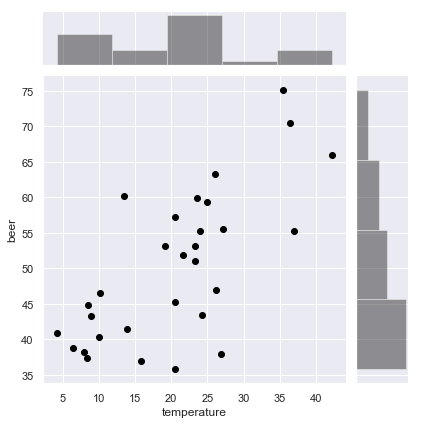

In [11]:
sns.jointplot(x='temperature',y='beer',data=beer,color='black')

In [12]:
lm_model = smf.ols(formula = 'beer ~ temperature', data=beer).fit()

In [13]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.11e-05
Time:                        16:04:44   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
null_model = smf.ols('beer ~ 1', data=beer).fit()
null_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                       nan
Date:                Sun, 22 Nov 2020   Prob (F-statistic):                nan
Time:                        16:07:52   Log-Likelihood:                -112.97
No. Observations:                  30   AIC:                             227.9
Df Residuals:                      29   BIC:                             229.3
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     50.1867      1.941     25.858      0.000      46.217      54.156
==============================================================================
Omnibus:                        1.957   Durbin-Watson:                   2.268
Prob(Omnibus):                  0.376   Jarque-Bera (JB):                1.777
Skew:                           0.520   Prob(JB):                        0.411
Kurtosis:                       2.419   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
aic = -2*(lm_model.llf-(lm_model.df_model+1))

In [29]:
aic

208.90902935575437

In [30]:
lm_model.aic

208.90902935575437

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


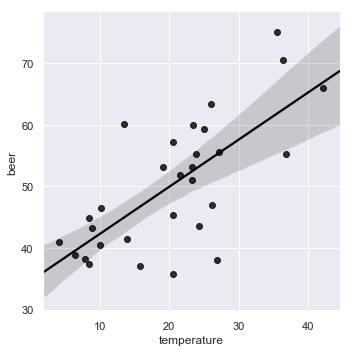

In [31]:
sns.lmplot(x='temperature', y='beer', data=beer, scatter_kws={'color':'black'}, line_kws={'color':'black'})

In [32]:
lm_model.predict()

array([50.301, 53.746, 42.264, 55.2  , 46.704, 37.825, 44.943, 54.511,
       52.445, 41.116, 54.664, 49.23 , 53.21 , 52.445, 41.04 , 52.598,
       45.25 , 61.783, 55.43 , 50.301, 42.418, 50.301, 51.143, 40.657,
       66.911, 52.904, 62.854, 41.423, 62.472, 39.509])

In [34]:
lm_model.predict(pd.DataFrame({'temperature':[0]}))

0    34.610215
dtype: float64

In [35]:
lm_model.params

Intercept      34.610215
temperature     0.765428
dtype: float64

In [36]:
lm_model.predict(pd.DataFrame({'temperature':[20]}))

0    49.918767
dtype: float64

In [37]:
beta0 = lm_model.params[0]
beta1 = lm_model.params[1]
temperature = 20
beta0 + beta1 * temperature

49.91876701095054

In [38]:
resid = lm_model.resid

In [39]:
resid.head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [40]:
y_hat = beta0 + beta1 * beer.temperature
y_hat.head(3)

0    50.301481
1    53.745905
2    42.264491
Name: temperature, dtype: float64

In [41]:
(beer.beer - y_hat).head(3)

0   -5.001481
1    5.554095
2   -1.864491
dtype: float64

In [42]:
mu = sp.mean(beer.beer)
y = beer.beer
yhat = lm_model.predict()
sp.sum((yhat-mu)**2)/sp.sum((y-mu)**2)

0.503959323061187

In [43]:
lm_model.rsquared

0.5039593230611856

In [44]:
sp.sum((yhat-mu)**2) + sum(resid**2)

3277.114666666669

In [45]:
sp.sum((y-mu)**2)

3277.1146666666655

In [46]:
1-sp.sum(resid**2)/sp.sum((y-mu)**2)

0.5039593230611857

In [47]:
n = len(beer.beer)
s = 1
1 - ((sp.sum(resid**2)/(n-s-1)) / (sp.sum((y-mu)**2)/(n-1)))

0.48624358459908523

In [49]:
lm_model.rsquared_adj

0.4862435845990851

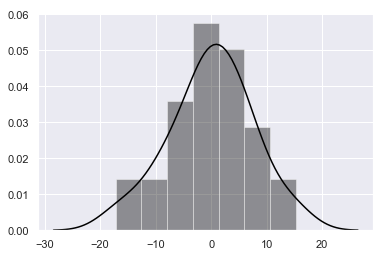

In [50]:
sns.distplot(resid, color='black')

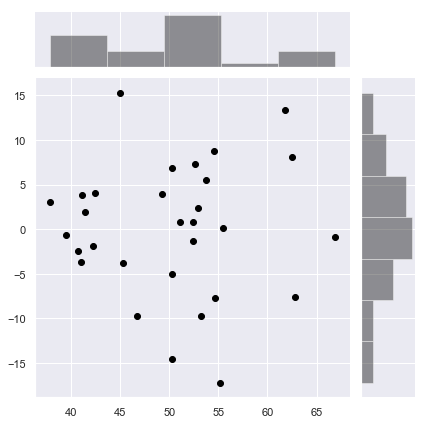

In [53]:
sns.jointplot(lm_model.fittedvalues, resid, joint_kws={'color':'black'}, marginal_kws={'color': 'black'})

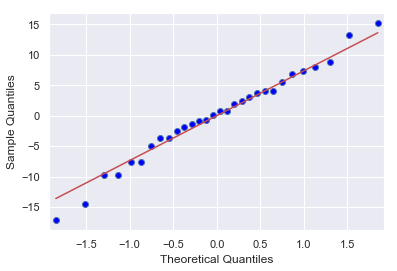

In [54]:
fig = sm.qqplot(resid, line='s')

In [55]:
resid_sort = resid.sort_values()
resid_sort.head()

3    -17.200217
21   -14.501481
12    -9.710106
4     -9.703971
10    -7.664418
dtype: float64

In [56]:
1/31

0.032

In [58]:
nobs = len(resid_sort)
cdf = np.arange(1, nobs+1)/(nobs+1)
cdf

array([0.032, 0.065, 0.097, 0.129, 0.161, 0.194, 0.226, 0.258, 0.29 ,
       0.323, 0.355, 0.387, 0.419, 0.452, 0.484, 0.516, 0.548, 0.581,
       0.613, 0.645, 0.677, 0.71 , 0.742, 0.774, 0.806, 0.839, 0.871,
       0.903, 0.935, 0.968])

In [62]:
ppf = stats.norm.ppf(cdf) # 標準正規分布
ppf

array([-1.849, -1.518, -1.3  , -1.131, -0.989, -0.865, -0.753, -0.649,
       -0.552, -0.46 , -0.372, -0.287, -0.204, -0.122, -0.04 ,  0.04 ,
        0.122,  0.204,  0.287,  0.372,  0.46 ,  0.552,  0.649,  0.753,
        0.865,  0.989,  1.131,  1.3  ,  1.518,  1.849])

In [63]:
help(stats.norm.ppf)

Help on method ppf in module scipy.stats._distn_infrastructure:

ppf(q, *args, **kwds) method of scipy.stats._continuous_distns.norm_gen instance
    Percent point function (inverse of `cdf`) at q of the given RV.
    
    Parameters
    ----------
    q : array_like
        lower tail probability
    arg1, arg2, arg3,... : array_like
        The shape parameter(s) for the distribution (see docstring of the
        instance object for more information)
    loc : array_like, optional
        location parameter (default=0)
    scale : array_like, optional
        scale parameter (default=1)
    
    Returns
    -------
    x : array_like
        quantile corresponding to the lower tail probability q.



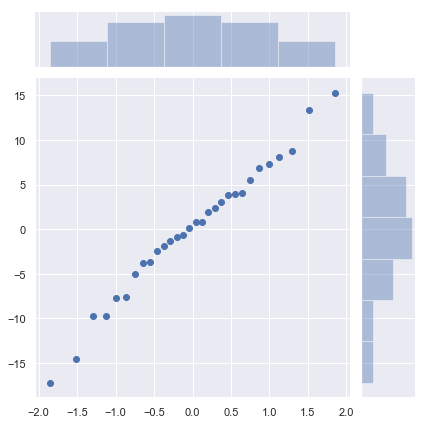

In [74]:
sns.jointplot(ppf,resid_sort,)

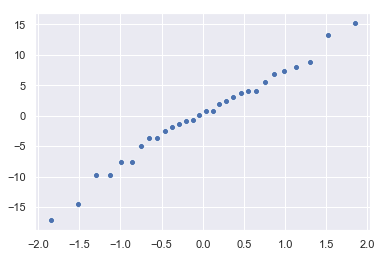

In [82]:
sns.scatterplot(ppf,resid_sort,)

In [83]:
# chapter2

In [84]:
weather = [
    "cloudy", "cloudy",
    "rainy", "rainy",
    "sunny", "sunny"
]
beer = [6,8,2,4,10,12]

In [86]:
weather_beer = pd.DataFrame({
    "beer":beer,
    "weather":weather
})
print(weather_beer)

   beer weather
0     6  cloudy
1     8  cloudy
2     2   rainy
3     4   rainy
4    10   sunny
5    12   sunny


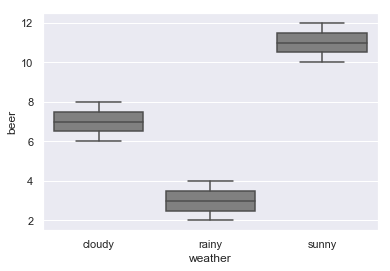

In [87]:
sns.boxplot(x='weather', y='beer', data=weather_beer, color='gray')

In [88]:
print(weather_beer.groupby('weather').mean())

         beer
weather      
cloudy      7
rainy       3
sunny      11


In [89]:
effect = [7,7,3,3,11,11]

In [90]:
mu_effect = sp.mean(effect)

In [91]:
squares_model = sp.sum((effect-mu_effect)**2)
squares_model

64.0

In [92]:
resid = weather_beer.beer - effect
resid

0   -1
1    1
2   -1
3    1
4   -1
5    1
Name: beer, dtype: int64

In [93]:
squares_resid = sp.sum(resid**2)
squares_resid

6

In [94]:
df_model = 2
df_resid = 3

In [95]:
variance_model = squares_model / df_model
variance_model

32.0

In [96]:
variance_resid = squares_resid / df_resid
variance_resid

2.0

In [97]:
f_ratio = variance_model / variance_resid

In [98]:
f_ratio

16.0

In [99]:
1 - sp.stats.f.cdf(x=f_ratio, dfn=df_model,dfd=df_resid)

0.02509457330439091

In [100]:
anova_model = smf.ols('beer ~ weather', data = weather_beer).fit()

In [101]:
print (sm.stats.anova_lm(anova_model,typ=2))

          sum_sq   df     F    PR(>F)
weather     64.0  2.0  16.0  0.025095
Residual     6.0  3.0   NaN       NaN


In [102]:
help(sm.stats.anova_lm)

Help on function anova_lm in module statsmodels.stats.anova:

anova_lm(*args, **kwargs)
    Anova table for one or more fitted linear models.
    
    Parameters
    ----------
    args : fitted linear model results instance
        One or more fitted linear models
    scale : float
        Estimate of variance, If None, will be estimated from the largest
        model. Default is None.
    test : str {"F", "Chisq", "Cp"} or None
        Test statistics to provide. Default is "F".
    typ : str or int {"I","II","III"} or {1,2,3}
        The type of Anova test to perform. See notes.
    robust : {None, "hc0", "hc1", "hc2", "hc3"}
        Use heteroscedasticity-corrected coefficient covariance matrix.
        If robust covariance is desired, it is recommended to use `hc3`.
    
    Returns
    -------
    anova : DataFrame
        When args is a single model, return is DataFrame with columns:
    
        sum_sq : float64
            Sum of squares for model terms.
        df : float64
 

In [103]:
anova_model.params

Intercept           7.0
weather[T.rainy]   -4.0
weather[T.sunny]    4.0
dtype: float64

In [104]:
fitted = anova_model.fittedvalues
fitted

0     7.0
1     7.0
2     3.0
3     3.0
4    11.0
5    11.0
dtype: float64

In [105]:
anova_model.resid

0   -1.0
1    1.0
2   -1.0
3    1.0
4   -1.0
5    1.0
dtype: float64

In [106]:
beer = pd.read_csv('sample/5-1-1-beer.csv')
lm_model = smf.ols(formula = 'beer ~ temperature', data=beer).fit()

In [107]:
df_lm_model = 1
df_lm_resid = 28

In [108]:
lm_effect = lm_model.fittedvalues
lm_resid = lm_model.resid
mu = sp.mean(lm_effect)
squares_lm_model = sp.sum((lm_effect - mu)**2)
variance_lm_model = squares_lm_model / df_lm_model
squares_lm_resid = sp.sum((lm_resid)**2)

In [109]:
variance_lm_resid = squares_lm_resid / df_lm_resid
f_value_lm = variance_lm_model / variance_lm_resid
f_value_lm

28.44698368850461

In [110]:
print(sm.stats.anova_lm(lm_model, typ=2))

                  sum_sq    df          F    PR(>F)
temperature  1651.532489   1.0  28.446984  0.000011
Residual     1625.582178  28.0        NaN       NaN


In [111]:
lm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   beer   R-squared:                       0.504
Model:                            OLS   Adj. R-squared:                  0.486
Method:                 Least Squares   F-statistic:                     28.45
Date:                Sun, 22 Nov 2020   Prob (F-statistic):           1.11e-05
Time:                        16:54:02   Log-Likelihood:                -102.45
No. Observations:                  30   AIC:                             208.9
Df Residuals:                      28   BIC:                             211.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept      34.6102      3.235     10.699      0.000      27.984      41.237
temperature     0.7654      0.144      5.334      0.000       0.471       1.059
==============================================================================
Omnibus:                        0.587   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.746   Jarque-Bera (JB):                0.290
Skew:                          -0.240   Prob(JB):                        0.865
Kurtosis:                       2.951   Cond. No.                         52.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [113]:
sales = pd.read_csv('sample/5-3-1-lm-model.csv')
print(sales.head(3))

   humidity  price  sales  temperature weather
0      29.5    290  229.7         17.8   rainy
1      38.1    290  206.1         26.1   rainy
2      31.5    290  202.5         22.0   rainy


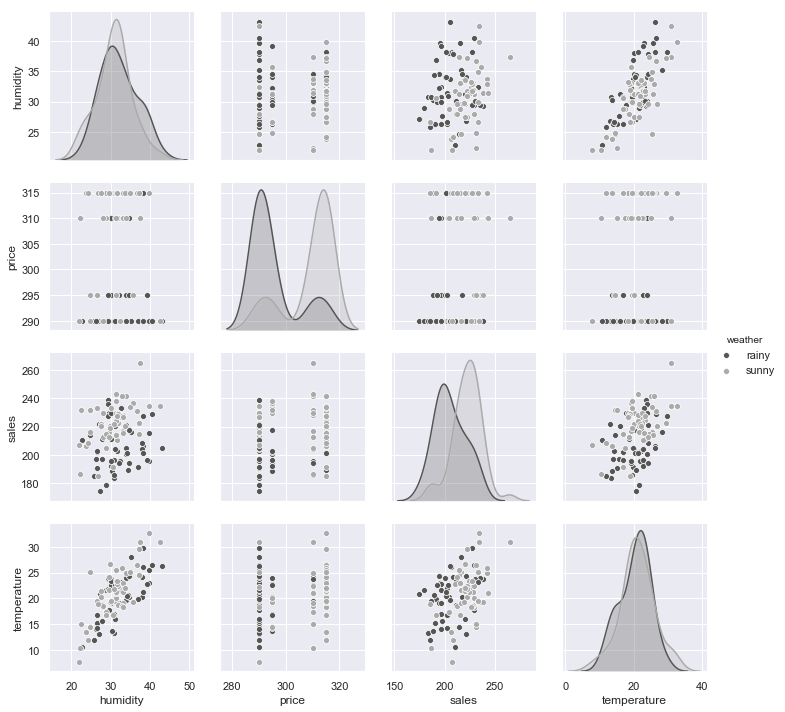

In [114]:
sns.pairplot(data=sales, hue='weather', palette='gray')

In [115]:
lm_dame = smf.ols('sales ~ price', sales).fit()
lm_dame.params

Intercept    113.645406
price          0.332812
dtype: float64

In [116]:
print(sm.stats.anova_lm(lm_dame,typ=2))

                sum_sq    df         F    PR(>F)
price      1398.392322   1.0  4.970685  0.028064
Residual  27570.133578  98.0       NaN       NaN


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


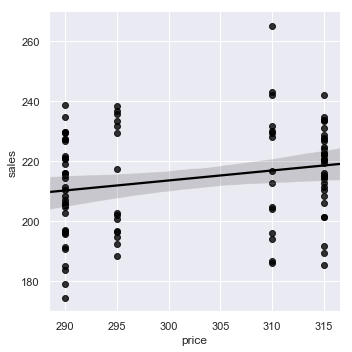

In [117]:
sns.lmplot(x='price', y='sales', data=sales, scatter_kws={'color':'black'}, line_kws={'color':'black'})

In [118]:
print(sales.groupby('weather').mean())

         humidity  price    sales  temperature
weather                                       
rainy      32.126  295.5  205.924       20.422
sunny      30.852  309.5  222.718       21.102


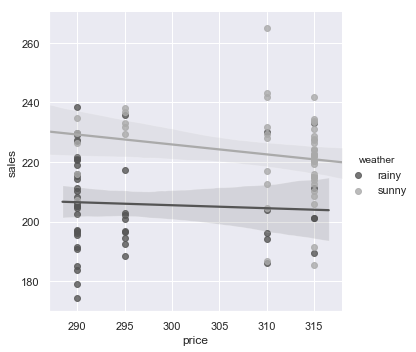

In [119]:
sns.lmplot(x='price', y='sales', data=sales, hue='weather', palette='gray')

In [122]:
lm_sales = smf.ols(
'sales ~ weather + humidity + temperature + price', data=sales).fit()
lm_sales.params

Intercept           278.627722
weather[T.sunny]     19.989119
humidity             -0.254055
temperature           1.603115
price                -0.329207
dtype: float64

In [123]:
print(sm.stats.anova_lm(lm_sales, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
humidity      1.0   1779.601  1779.601   9.805   0.002
temperature   1.0   2076.845  2076.845  11.443   0.001
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [125]:
lm_sales_2 = smf.ols(
'sales ~ weather + temperature + humidity + price', data = sales).fit()
print(sm.stats.anova_lm(lm_sales_2, typ=1).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  38.848   0.000
temperature   1.0   3814.779  3814.779  21.018   0.000
humidity      1.0     41.667    41.667   0.230   0.633
price         1.0    818.402   818.402   4.509   0.036
Residual     95.0  17242.717   181.502     NaN     NaN


In [126]:
lm_sales.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [128]:
lm_sales_2.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,278.6277,46.335,6.013,0.000,186.641,370.615
weather[T.sunny],19.9891,3.522,5.675,0.000,12.997,26.982
temperature,1.6031,0.443,3.620,0.000,0.724,2.482
humidity,-0.2541,0.456,-0.558,0.578,-1.159,0.651
price,-0.3292,0.155,-2.123,0.036,-0.637,-0.021


In [129]:
mod_null = smf.ols('sales ~ 1', sales).fit()

In [131]:
resid_sq_null = sp.sum(mod_null.resid ** 2)
resid_sq_null

28968.525899999993

In [132]:
mod_1 = smf.ols('sales ~ weather', sales).fit()
resid_sq_1 = sp.sum(mod_1.resid**2)
resid_sq_1

21917.565

In [133]:
resid_sq_null - resid_sq_1

7050.960899999995

In [134]:
print(sm.stats.anova_lm(mod_1).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  31.527     0.0
Residual  98.0  21917.565   223.649     NaN     NaN


In [136]:
mod_2 = smf.ols(
'sales ~ weather + humidity', sales).fit()
resid_sq_2 = sp.sum(mod_2.resid ** 2)
resid_sq_2

20137.963897851758

In [137]:
resid_sq_1 - resid_sq_2

1779.601102148241

In [138]:
print(sm.stats.anova_lm(mod_2).round(3))

            df     sum_sq   mean_sq       F  PR(>F)
weather    1.0   7050.961  7050.961  33.963   0.000
humidity   1.0   1779.601  1779.601   8.572   0.004
Residual  97.0  20137.964   207.608     NaN     NaN


In [139]:
mod_2_2 = smf.ols(
'sales ~ weather + temperature', sales).fit()
resid_sq_2_2 = sp.sum(mod_2_2.resid ** 2)
resid_sq_2_2

18102.78642671223

In [141]:
mod_3_2 = smf.ols(
'sales ~ weather + temperature + humidity',
sales).fit()
resid_sq_3_2 = sp.sum(mod_3_2.resid ** 2)
resid_sq_3_2

18061.11936158843

In [142]:
resid_sq_2_2 - resid_sq_3_2

41.667065123801876

In [144]:
print(sm.stats.anova_lm(mod_3_2).round(3))

               df     sum_sq   mean_sq       F  PR(>F)
weather       1.0   7050.961  7050.961  37.478   0.000
temperature   1.0   3814.779  3814.779  20.277   0.000
humidity      1.0     41.667    41.667   0.221   0.639
Residual     96.0  18061.119   188.137     NaN     NaN


In [149]:
mod_full = smf.ols(
'sales ~ weather + humidity + temperature + price', sales).fit()
resid_sq_full = sp.sum(mod_full.resid ** 2)
resid_sq_full

17242.716942366485

In [150]:
mod_non_humi = smf.ols(
'sales ~ weather + temperature + price', sales).fit()
resid_sq_non_humi = sp.sum(mod_non_humi.resid ** 2)
resid_sq_non_humi

17299.142016107664

In [152]:
resid_sq_non_humi - resid_sq_full

56.425073741178494

In [154]:
print(sm.stats.anova_lm(mod_full, typ=2).round(3))
mod_full.compare_f_test(mod_non_humi)

                sum_sq    df       F  PR(>F)
weather       5845.878   1.0  32.208   0.000
humidity        56.425   1.0   0.311   0.578
temperature   2378.017   1.0  13.102   0.000
price          818.402   1.0   4.509   0.036
Residual     17242.717  95.0     NaN     NaN


(0.31087803756965626, 0.5784533427120666, 1.0)

In [155]:
print(sm.stats.anova_lm(mod_non_humi, typ=2).round(3))

                sum_sq    df       F  PR(>F)
weather       6354.966   1.0  35.266   0.000
temperature   4254.736   1.0  23.611   0.000
price          803.644   1.0   4.460   0.037
Residual     17299.142  96.0     NaN     NaN


In [156]:
mod_non_humi.params

Intercept           273.301800
weather[T.sunny]     20.393871
temperature           1.417860
price                -0.326001
dtype: float64

In [157]:
print(mod_full.aic.round(3))
print(mod_non_humi.aic.round(3))

808.785
807.112
